First 3 rows:
   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   

   exercise induced angina  oldpeak  ST segment  major vessels  thal  \
0                        0      2.4           2              3     3   
1                        0      1.6           2              0     7   
2                        0      0.3           1              0     7   

   heart disease  
0              2  
1              1  
2             

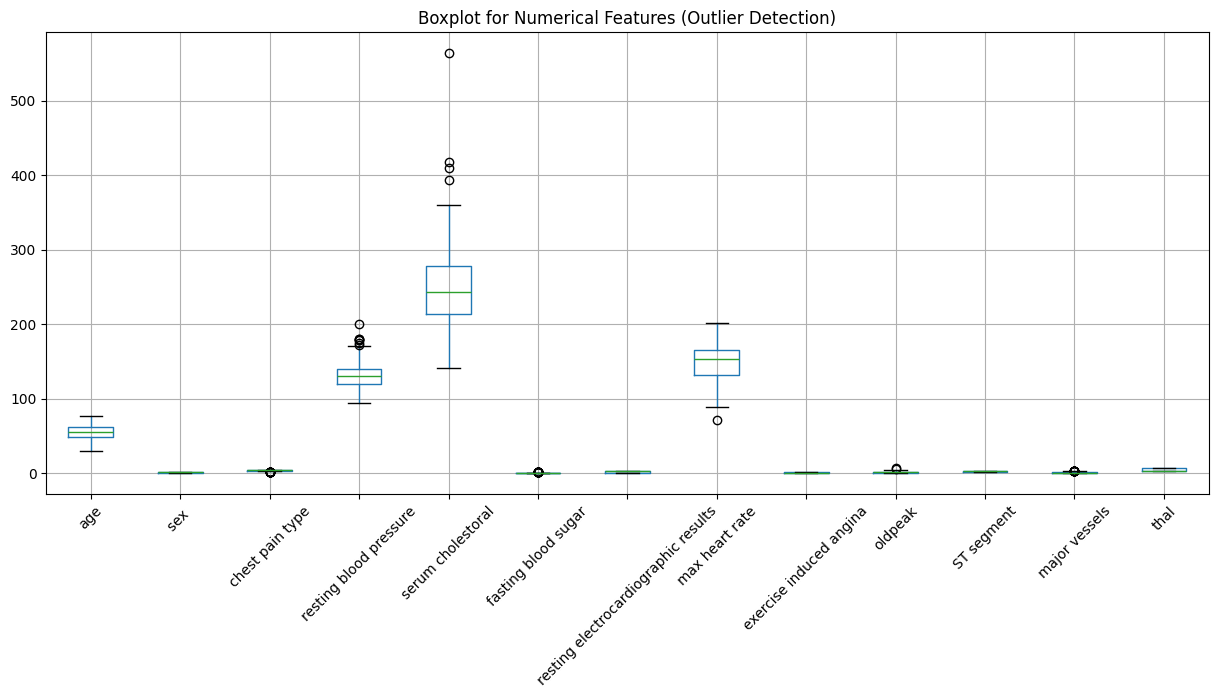


Outlier treatment completed using IQR capping.

Final Train Shape: (216, 13)
Final Test Shape: (54, 13)

Data Loading, Splitting, Cleaning, Encoding, Outlier Detection, and Scaling Completed Successfully.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1. Load data into Pandas DataFrame
df = pd.read_csv("/content/dataset_heart.csv")

# 2. Initial Inspection
print("First 3 rows:")
print(df.head(3))

print("\nDataset Shape (rows, columns):")
print(df.shape)

print("\nColumn Data Types:")
print(df.dtypes)

print("\nMissing Values per Column:")
print(df.isnull().sum())

# 3. Identify Target Variable
target = df.columns[-1]
print("\nTarget Variable:", target)

X = df.drop(columns=[target])
y = df[target]

# Identify numerical and categorical features
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

print("\nNumerical Features:", list(num_cols))
print("Categorical Features:", list(cat_cols))

# 4. Data Cleaning & Preparation

# 4.1 Train-Test Split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 4.2 Handling Missing Values
# -------------------------------
# Numerical → Mean Imputation
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].mean())

# Categorical → Mode Imputation
for col in cat_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

print("\nMissing Values After Cleaning (Train):")
print(X_train.isnull().sum().sum())

# -------------------------------
# 4.3 Feature Encoding
# -------------------------------
# One-Hot Encoding for categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align train & test columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# -------------------------------
# 4.4 Outlier Detection (Optional but included)
# -------------------------------
# Boxplot visualization
plt.figure(figsize=(15, 6))
X_train[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features (Outlier Detection)")
plt.show()

# IQR Capping
for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[col] = X_train[col].clip(lower_bound, upper_bound)
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)

print("\nOutlier treatment completed using IQR capping.")

# ===============================
# 4.5 Feature Scaling (Standardization)
# ===============================
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# ===============================
# 5. Save Processed Dataset
# ===============================
processed_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
processed_df.to_csv("/content/heart_processed.csv", index=False)

print("\nFinal Train Shape:", X_train.shape)
print("Final Test Shape:", X_test.shape)
print("\nData Loading, Splitting, Cleaning, Encoding, Outlier Detection, and Scaling Completed Successfully.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')